# Homework-1: "Hello, graph world"

In this assignment, we will create the nodes and edges for a basic graph, the Krackhardt kite. Two pacakges, Graphlab and NetworkX were used.

## 1. Graphlab 

First, use package graphlab to draw the network graph.

In [25]:
import graphlab

In [27]:
#graphlab.get_dependencies()

In [3]:
import graphlab as gl

In [4]:
gl.canvas.set_target('ipynb') # use IPython Notebook output for GraphLab Canvas

### 1.1 Load the data

In [5]:
vs = gl.SFrame.read_csv('https://raw.githubusercontent.com/YunMai-SPS/DATA620_homework/master/kite_vertices.csv')
es = gl.SFrame.read_csv('https://raw.githubusercontent.com/YunMai-SPS/DATA620_homework/master/kite_edges.csv')

This non-commercial license of GraphLab Create for academic use is assigned to yun.mai@spsmail.cuny.edu and will expire on June 09, 2019.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\lizhi\AppData\Local\Temp\graphlab_server_1528836614.log.0


Downloading https://raw.githubusercontent.com/YunMai-SPS/DATA620_homework/master/kite_vertices.csv to C:/Users/lizhi/AppData/Local/Temp/graphlab-lizhi/11868/4d11328d-47e9-4017-b39e-a967d597a071.csv

Finished parsing file https://raw.githubusercontent.com/YunMai-SPS/DATA620_homework/master/kite_vertices.csv

Parsing completed. Parsed 10 lines in 0.06696 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,long]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file https://raw.githubusercontent.com/YunMai-SPS/DATA620_homework/master/kite_vertices.csv

Parsing completed. Parsed 10 lines in 0.059957 secs.

Downloading https://raw.githubusercontent.com/YunMai-SPS/DATA620_homework/master/kite_edges.csv to C:/Users/lizhi/AppData/Local/Temp/graphlab-lizhi/11868/19def177-0f02-422f-85f3-598e2ac62e31.csv

Finished parsing file https://raw.githubusercontent.com/YunMai-SPS/DATA620_homework/master/kite_edges.csv

Parsing completed. Parsed 35 lines in 0.044965 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file https://raw.githubusercontent.com/YunMai-SPS/DATA620_homework/master/kite_edges.csv

Parsing completed. Parsed 35 lines in 0.033979 secs.

#### vertices 

In [6]:
vs

name,dgree
Andre,4
Beverly,4
Carol,3
Diane,6
Ed,3
Fernando,5
Garth,5
Heather,3
Ike,2
Jane,1


In [7]:
vs.show()

#### Edges

In [8]:
es

src,dst
Andre,Beverly
Andre,Carol
Andre,Fernando
Andre,Diane
Beverly,Andre
Beverly,Ed
Beverly,Diane
Beverly,Garth
Carol,Andre
Carol,Diane


In [9]:
es.show()

### 1.2 Create the graph

In [10]:
g = gl.SGraph()

In [11]:
# add some vertices in a dataflow-ish way
g = g.add_vertices(vertices=vs, vid_field='name')

# add edges  
g = g.add_edges(edges=es, src_field='src', dst_field='dst')

In [12]:
g.show(vlabel='id', arrows=False)

## 2. NetworkX

Then use a different package NetworkX to draw the network graph and do analysis.

###  2.1 Create graph

In [13]:
import networkx as nx

In [14]:
G = nx.Graph()

In [15]:
G.add_nodes_from(list(vs['name']))
list(G.nodes)

['Heather',
 'Ed',
 'Diane',
 'Fernando',
 'Andre',
 'Ike',
 'Garth',
 'Beverly',
 'Carol',
 'Jane']

In [16]:
G.add_edges_from( [('Andre','Beverly'),('Andre','Carol'),('Andre','Diane'),('Beverly','Andre'),('Beverly','Diane'),('Beverly','Ed'),('Carol','Andre'),('Carol','Diane'),('Carol','Fernando'),('Diane','Andre'),('Diane','Beverly'),('Diane','Carol'),('Diane','Ed'),('Diane','Fernando'),('Diane','Garth'),('Ed','Beverly'),('Ed','Diane'),('Ed','Garth'),('Fernando','Carol'),('Fernando','Diane'),('Fernando','Garth'),('Fernando','Heather'),('Garth','Ed'),('Garth','Diane'),('Garth','Fernando'),('Garth','Heather'),('Heather','Fernando'),('Heather','Garth'),('Heather','Ike'),('Ike','Heather'),('Ike','Jane'),('Jane','Ike')] ) 
list(G.edges)

[('Heather', 'Fernando'),
 ('Heather', 'Ike'),
 ('Heather', 'Garth'),
 ('Ed', 'Beverly'),
 ('Ed', 'Diane'),
 ('Ed', 'Garth'),
 ('Diane', 'Fernando'),
 ('Diane', 'Andre'),
 ('Diane', 'Garth'),
 ('Diane', 'Beverly'),
 ('Diane', 'Carol'),
 ('Fernando', 'Carol'),
 ('Fernando', 'Garth'),
 ('Andre', 'Beverly'),
 ('Andre', 'Carol'),
 ('Ike', 'Jane')]

In [17]:
G.number_of_nodes()

10

In [18]:
G.number_of_edges()

16

In [19]:
import matplotlib.pyplot as plt

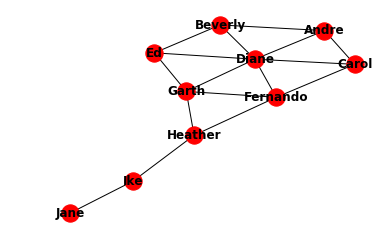

In [20]:
plt.subplot(111)
nx.draw(G, with_labels=True, font_weight='bold')

### 2.2 Graph Analysis

In [21]:
import pandas as pd

#### calculate the betweenness of the vertices 

In [22]:
betweenness = nx.betweenness_centrality(G)
betweenness = pd.DataFrame(betweenness.items(),columns=['name', 'betweenness'])
betweenness = betweenness.sort_values(by='betweenness',ascending=False)
betweenness

,name,betweenness
0,Heather,0.388889
2,Diane,0.277778
3,Fernando,0.222222
5,Ike,0.222222
6,Garth,0.222222
1,Ed,0.041667
8,Carol,0.041667
4,Andre,0.013889
7,Beverly,0.013889
9,Jane,0.000000


Hether has the highest betweenness among all the nodes, suggesting Hether plays a powerful role in the network and has great influence over what flows in the network. 

#### calculate the closeness of the vertices 

In [23]:
closeness = nx.closeness_centrality(G)
closeness = pd.DataFrame(closeness.items(),columns=['name', 'closeness'])
closeness = closeness.sort_values(by='closeness',ascending=False)
closeness

,name,closeness
2,Diane,0.600000
3,Fernando,0.600000
6,Garth,0.600000
0,Heather,0.529412
1,Ed,0.500000
8,Carol,0.500000
4,Andre,0.428571
7,Beverly,0.428571
5,Ike,0.391304
9,Jane,0.290323


Diane, Fernando and Garth have the highest closeness among all the nodes, suggesting they can access all the nodes in the network more quickly than anyone else. They have the shortest paths to all others. They are in the best positions to monitor what is happening in the network.

The link to the video record: https://www.useloom.com/share/ff5f5d5e569840ac88d2faa2f6373e11